In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
#load dataset:
store=pd.read_csv("C:/Users/user/Downloads/Data/Sales Forecasting/stores.csv")
features=pd.read_csv("C:/Users/user/Downloads/Data/Sales Forecasting/features.csv")
train=pd.read_csv("C:/Users/user/Downloads/Data/Sales Forecasting/train.csv")

features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [3]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [4]:
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
store.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [6]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [8]:
# Merge datasets
data = train.merge(store, on='Store', how='left')
data = data.merge(features, on=['Store', 'Date'], how='left')



In [14]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
# Exploratory Data Analysis (EDA):
plt.figure(figsize=(10,8))
sns.histplot(data["Weekly_Sales"],kde=True,color="blue")
plt.title("Sales Distribution")
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Date', y='Weekly_Sales', data=data)
plt.title('Sales Distribution vs Date')
plt.show()

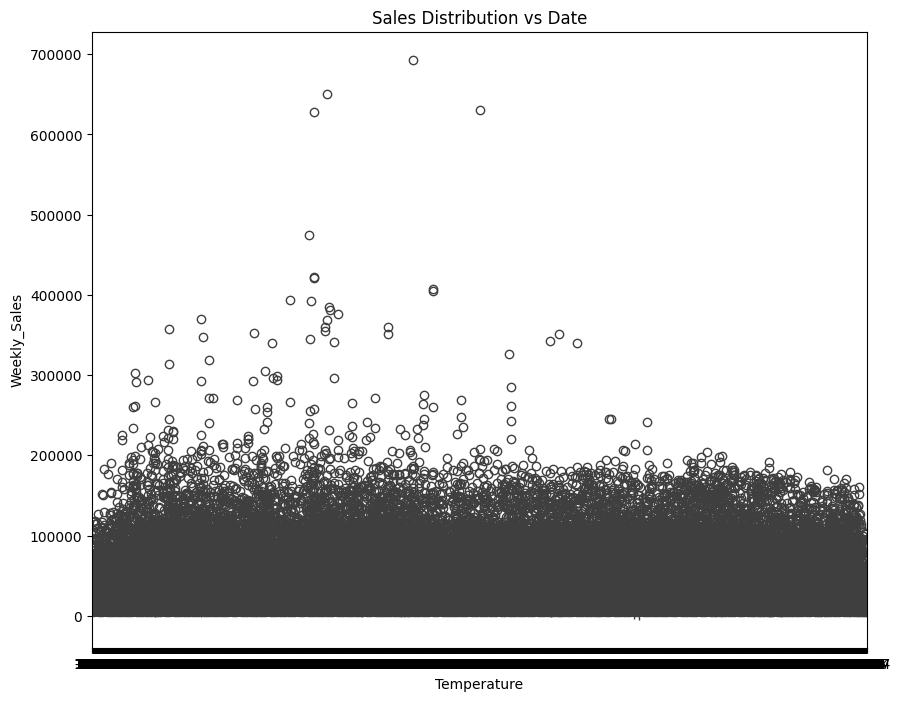

In [15]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Temperature', y='Weekly_Sales', data=data)
plt.title('Sales Distribution vs Date')
plt.show()

In [21]:
le=LabelEncoder()
cols=["Date","IsHoliday_x","Type","IsHoliday_y","Date"]
for col in cols:
    data[col]=le.fit_transform(data[col])

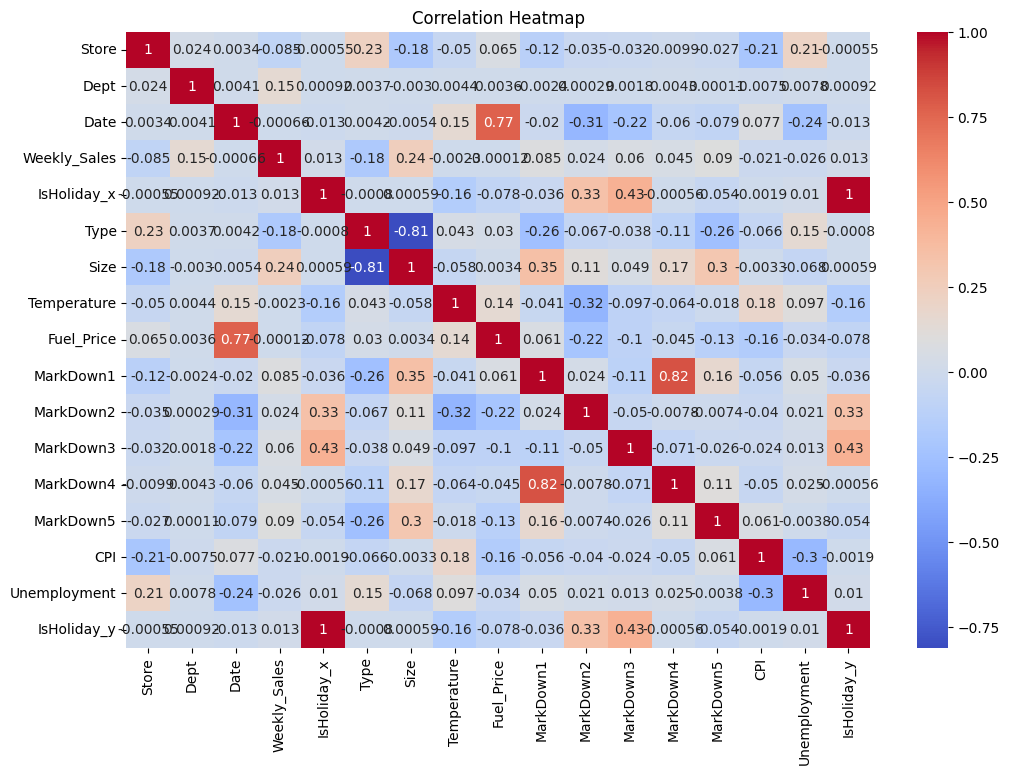

In [22]:
corr_matrix = data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [26]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,store_type
0,1,1,0,24924.50,0,0,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,NaN
1,1,1,1,46039.49,1,0,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1,NaN
2,1,1,2,41595.55,0,0,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,0,NaN
3,1,1,3,19403.54,0,0,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,0,NaN
4,1,1,4,21827.90,0,0,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,0,NaN


In [ ]:
data['Holiday'] = data['IsHoliday_x'].where(data['IsHoliday_x'] == 1, 0)
data['Holiday'] = data['IsHoliday_y'].where(data['IsHoliday_y'] == 1, 0)

data = data.drop(['IsHoliday_y'], axis=1)
data = data.drop(['IsHoliday_x'], axis=1)
data=data.drop(["Dept"],axis=1)

In [32]:
data['store_type'] = data['Store'].map({'A': 1, 'B': 2, 'C': 3})
data['Holiday'] = data['Holiday'].astype(int)

In [ ]:
data["MarkDown1"].fillna(data["MarkDown1"].median(), inplace=True)
data["MarkDown2"].fillna(data["MarkDown2"].median(), inplace=True)
data["MarkDown3"].fillna(data["MarkDown3"].median(), inplace=True)
data["MarkDown4"].fillna(data["MarkDown4"].median(), inplace=True)
data["MarkDown5"].fillna(data["MarkDown5"].median(), inplace=True)

data["store_type"].fillna(data["store_type"].mean(), inplace=True)



In [49]:
le=LabelEncoder()
cols=['store_type']
for col in cols:
    data[col]=le.fit_transform(data[col])

In [50]:
data.head()

,Store,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,store_type,Holiday
0,1,0,24924.50,0,151315,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,0,0
1,1,1,46039.49,0,151315,38.51,2.548,5347.45,192.0,24.6,1481.31,3359.45,211.242170,8.106,0,1
2,1,2,41595.55,0,151315,39.93,2.514,5347.45,192.0,24.6,1481.31,3359.45,211.289143,8.106,0,0
3,1,3,19403.54,0,151315,46.63,2.561,5347.45,192.0,24.6,1481.31,3359.45,211.319643,8.106,0,0
4,1,4,21827.90,0,151315,46.50,2.625,5347.45,192.0,24.6,1481.31,3359.45,211.350143,8.106,0,0


In [51]:
X = data.drop(columns = "Weekly_Sales", axis = 1)
y = data["Weekly_Sales"]                            # Target variable

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print('StandardScaler',X_test_scaled)

StandardScaler [[ 0.45380258  0.69967041 -0.88433588 ...  2.26284472  0.
  -0.27477051]
 [-0.32855119  0.91775056  0.61616764 ...  0.05897563  0.
  -0.27477051]
 [ 1.23615634 -0.07572565  2.11667116 ...  3.09304735  0.
  -0.27477051]
 ...
 [ 1.15792096  0.48159027  2.11667116 ... -0.13343415  0.
  -0.27477051]
 [ 1.39262709 -1.57805552 -0.88433588 ... -1.11102589  0.
  -0.27477051]
 [-0.17208043 -1.45689988 -0.88433588 ... -0.0583997   0.
  -0.27477051]]


In [65]:
liner_reg = LinearRegression()
liner_reg.fit(X_train_scaled, y_train)



LinearRegression()

In [58]:
#preditions:

y_pred = liner_reg.predict(X_test_scaled)

In [59]:
y_pred

array([21178.52240746, 15005.70784063,  6990.16911009, ...,
        6320.2362666 , 16042.15360517, 20984.38758589], shape=(84314,))

In [63]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)
print("Mean Squared Error :",mse)
print("Root Mean Squared Error :", rmse)
print("R-squared :",r2)

Mean Squared Error : 486539450.09506595
Root Mean Squared Error : 22057.63926840463
R-squared : 0.06698655008579135


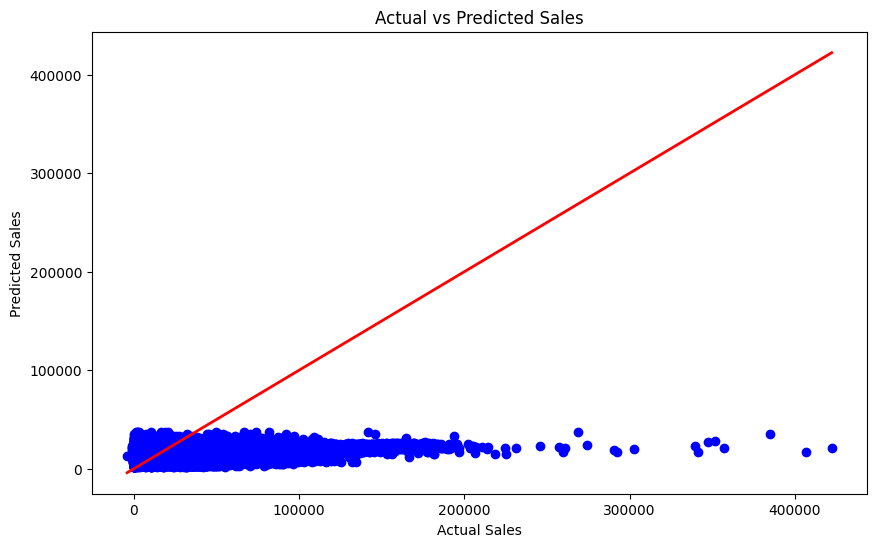

In [62]:
# Visualize Actual vs Predicted Sales
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()